In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **Análise Exploratória de Dados sobre Acidentes nas Estradas Brasileiras**


O propósito central desta análise consiste em compreender a causa predominante dos acidentes ocorridos nas estradas brasileiras, além de explorar os contextos propícios a esses incidentes. Nosso enfoque reside na identificação de padrões e tendências que permitam uma maior profundidade no entendimento dos fatores subjacentes aos acidentes rodoviários no Brasil.


<center>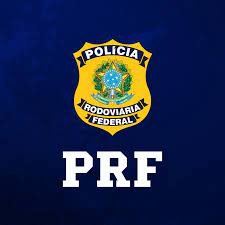</center>


## 1. Obtenção dos Dados
O conjunto de dados foi coletado a partir da [base pública da PRF](https://www.gov.br/prf/pt-br/acesso-a-informacao/dados-abertos/dados-abertos-da-prf) (Polícia Rodoviária Federal) e abrange o período de janeiro a agosto de 2023. Esta base é uma fonte oficial e pública que contém registros de acidentes de trânsito ocorridos em rodovias de todo o Brasil durante esse intervalo de tempo. Essas informações são fundamentais para a nossa análise, possibilitando uma compreensão mais aprofundada e embasada para a tomada de decisões relacionadas à segurança nas estradas.

**Dicionário das variáveis**

* `id` - Número de identificação único para cada registro no conjunto de dados.
* `data_inversa` - Data do acidente no formato AAAAMMDD (exemplo: 2023-03-13).
* `dia_semana` - Dia da semana em que o acidente ocorreu (exemplo: segunda-feira).
* `horario` - Hora do acidente no formato HH:MM:SS (exemplo: 18:10:00).
* `uf` - Unidade Federativa onde o acidente ocorreu (exemplo: ES - Espírito Santo).
* `br` - Número da rodovia onde o acidente ocorreu (exemplo: 101.0).
* `km` - Quilômetro exato da rodovia onde o acidente ocorreu (exemplo: 293,6).
* `municipio` - Município onde o acidente ocorreu (exemplo: CARIACICA).
* `causa_acidente` - Causa principal do acidente (exemplo: Ausência de sinalização).
* `tipo_acidente` - Tipo de acidente (exemplo: Atropelamento de Pedestre).
* `classificacao_acidente` - Classificação do acidente (exemplo: Com Vítimas Feridas).
* `fase_dia` - Fase do dia em que o acidente ocorreu (exemplo: Anoitecer).
* `sentido_via` - Sentido da via no momento do acidente (exemplo: Crescente).
* `condicao_metereologica` - Condição meteorológica no momento do acidente (exemplo: Céu Claro).
* `tipo_pista` - Tipo de pista (exemplo: Múltipla).
* `tracado_via` - Traçado da via no momento do acidente (exemplo: Reta).
* `uso_solo` - Se a área onde o acidente ocorreu é utilizada para fins agrícolas ou não (exemplo: Sim).
* `pessoas` - Número total de pessoas envolvidas no acidente (exemplo: 2).
* `mortos` - Número de pessoas mortas no acidente (exemplo: 0).
* `feridos_leves` - Número de pessoas com ferimentos leves no acidente (exemplo: 0).
* `feridos_graves` - Número de pessoas com ferimentos graves no acidente (exemplo: 1).
* `ilesos` - Número de pessoas ilesas no acidente (exemplo: 1).
* `ignorados` - Número de pessoas cujo estado não foi informado no acidente (exemplo: 0).
* `feridos` - Número total de pessoas feridas no acidente (exemplo: 1).
* `veiculos` - Número total de veículos envolvidos no acidente (exemplo: 1).
* `latitude` - Coordenada de latitude do local do acidente (exemplo: -20.324159).
* `longitude` - Coordenada de longitude do local do acidente (exemplo: -40.395290).
* `regional` - Regional de tráfego onde o acidente ocorreu (exemplo: SPRF-ES).
* `delegacia` - Delegacia responsável pelo registro do acidente (exemplo: DEL01-ES).
* `uop` - Unidade Operacional da Polícia Rodoviária responsável pelo atendimento do acidente (exemplo: UOP01-DEL01-ES).

## 2\. Pacotes e bibliotecas

In [ ]:
# Importando pacotes necessários
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import folium

## 3\. Exploração de Dados

Na fase de Exploração dos Dados, nosso propósito verificar o dataset e garantir o entendimento das variveis presentes e suas distribuições. Também é imporatante assegurar que os dados estejam isentos de imperfeições, como valores ausentes ou inconsistências, e realizar a adequada transformação das colunas para o formato correto. Essa abordagem visa proporcionar informações confiáveis para embasar nossa análise.

### **3.1 Coleta de Dados**

In [ ]:
# Lendo o Arquivo csv
df_prf_2023 = pd.read_csv('/content/drive/MyDrive/PoDAcademy/Datasets/PRF/datatran2023.csv', delimiter=';', encoding='ISO-8859-1')

In [ ]:
# Primeiras 5 linhas

df_prf_2023.head()

,id,data_inversa,dia_semana,horario,uf,br,km,municipio,causa_acidente,tipo_acidente,...,feridos_graves,ilesos,ignorados,feridos,veiculos,latitude,longitude,regional,delegacia,uop
0,496519,2023-01-01,domingo,02:00:00,ES,101.0,114,SOORETAMA,Ausência de reação do condutor,Saída de leito carroçável,...,0,0,0,1,1,"-19,09484877","-40,05095848",SPRF-ES,DEL04-ES,UOP01-DEL04-ES
1,496543,2023-01-01,domingo,03:40:00,SP,116.0,"113,1",TAUBATE,Entrada inopinada do pedestre,Atropelamento de Pedestre,...,0,0,4,0,1,"-23,0445658","-45,58259814",SPRF-SP,DEL02-SP,UOP02-DEL02-SP
2,496590,2023-01-01,domingo,01:40:00,MT,163.0,1112,GUARANTA DO NORTE,Reação tardia ou ineficiente do condutor,Tombamento,...,1,0,0,1,1,"-9,70020602","-54,87588757",SPRF-MT,DEL06-MT,UOP03-DEL06-MT
3,496610,2023-01-01,domingo,10:40:00,PR,376.0,"314,8",ORTIGUEIRA,Velocidade Incompatível,Tombamento,...,0,1,0,0,1,"-23,985512","-51,083555",SPRF-PR,DEL07-PR,UOP02-DEL07-PR
4,496659,2023-01-01,domingo,14:55:00,MG,116.0,"569,4",MANHUACU,Acumulo de água sobre o pavimento,Colisão frontal,...,2,1,0,2,2,"-20,10007457","-42,17884091",SPRF-MG,DEL06-MG,UOP03-DEL06-MG


In [ ]:
# Quantidade de Linhas / Colunas

df_prf_2023.shape

(44035, 30)

### **3.2 Preparação dos Dados**

#### **3.2.1 Metadados**

In [ ]:
# Construindo função para obter metadados
def metadados(dataframe):
    """
    Gera um dataframe contendo metadados das colunas do dataframe fornecido.

    :dataframe: DataFrame para o qual os metadados serão gerados.
    :return: DataFrame contendo metadados.
    """

    # Coleta de metadados básicos
    metadata = pd.DataFrame({
        'nome_variavel': dataframe.columns,
        'tipo': dataframe.dtypes,
        'qt_nulos': dataframe.isnull().sum(),
        'percent_nulos': round((dataframe.isnull().sum() / len(dataframe))* 100,2),
        'cardinalidade': dataframe.nunique(),
    })
    metadata=metadata.sort_values(by='tipo',ascending=False)
    metadata = metadata.reset_index(drop=True)

    return metadata

In [ ]:
# Obtendo metadados
metadados_prf = metadados(df_prf_2023)
metadados_prf.head(30)

,nome_variavel,tipo,qt_nulos,percent_nulos,cardinalidade
0,tracado_via,object,0,0.00,10
1,fase_dia,object,0,0.00,4
2,delegacia,object,422,0.96,146
3,regional,object,4,0.01,28
4,longitude,object,0,0.00,25887
5,latitude,object,0,0.00,25894
6,uso_solo,object,0,0.00,2
7,data_inversa,object,0,0.00,243
8,tipo_pista,object,0,0.00,3
9,condicao_metereologica,object,0,0.00,9


* A coluna `delegacia` possui 422 valores nulos, o que representa somente 0,96% de dados nulos. Os valores nulos vão ser substituidos por "Não preenchido", dado que é uma variável do tipo categórica.


* A variável `br` que representa as rodovias do Brasil é a unica variável do tipo float que possui valores nulos, esses valores vão ser substituidos por 0.

#### **3.2.2 Tratando Tipos incorretos de variáveis**

* Alterar o tipo das variáveis `longitude` e `latitude`
para float, pois essas variáveis irão ser utilizadas para gerar gráficos;

* Mudar o tipo da coluna `data_inversa`, de `object` para `datetime`.

In [ ]:
# Alterando para float
df_prf_2023['longitude'] = df_prf_2023['longitude'].str.replace(',', '.').astype(float)
df_prf_2023['latitude'] = df_prf_2023['latitude'].str.replace(',', '.').astype(float)

# Verificando alteração
df_prf_2023[['latitude', 'latitude']].dtypes

latitude    float64
latitude    float64
dtype: object

In [ ]:
# Alterando para datetime
df_prf_2023['data_inversa'] = pd.to_datetime(df_prf_2023['data_inversa'], format='%Y-%m-%d')

# Verificando alteração
df_prf_2023['data_inversa'].dtypes

dtype('<M8[ns]')

#### **3.2.3 Dados Faltantes**

In [ ]:
# Substituindo nulos das variáveis categóricas
var_categoricas = df_prf_2023.select_dtypes(include=['object']).columns
df_prf_2023[var_categoricas] = df_prf_2023[var_categoricas].fillna('Não Preenchido')

In [ ]:
# Substituindo nulos da variável numérica br por 0
df_prf_2023['br'].fillna(0, inplace=True)


In [ ]:
# Validando valores nulos
metadados_prf = metadados(df_prf_2023)
metadados_prf.head(30)

,nome_variavel,tipo,qt_nulos,percent_nulos,cardinalidade
0,tracado_via,object,0,0.0,10
1,classificacao_acidente,object,0,0.0,3
2,delegacia,object,0,0.0,147
3,regional,object,0,0.0,29
4,uso_solo,object,0,0.0,2
5,tipo_pista,object,0,0.0,3
6,condicao_metereologica,object,0,0.0,9
7,sentido_via,object,0,0.0,3
8,fase_dia,object,0,0.0,4
9,uop,object,0,0.0,393


## 4\. Análise Exploratória


### 4\.1 Distribuição de Variáveis Numéricas

In [ ]:
# Entendendo os dados numéricos
df_prf_2023.describe()

,id,br,pessoas,mortos,feridos_leves,feridos_graves,ilesos,ignorados,feridos,veiculos,latitude,longitude
count,44035.000000,44035.000000,44035.000000,44035.000000,44035.000000,44035.000000,44035.000000,44035.000000,44035.000000,44035.000000,44035.000000,44035.000000
mean,521660.357761,209.954718,2.462019,0.084274,0.872352,0.277120,1.071693,0.156580,1.149472,1.670353,-19.006890,-46.579507
std,14223.260883,129.932091,2.198093,0.334204,1.072279,0.612197,1.810821,0.440062,1.182761,0.723926,7.687616,6.157540
min,496506.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,-33.588291,-70.268638
25%,509444.500000,101.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,-25.260925,-50.419539
50%,521829.000000,158.000000,2.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,2.000000,-20.534590,-47.493420
75%,533955.500000,324.000000,3.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,2.000000,-12.904822,-42.596053
max,549361.000000,495.000000,73.000000,7.000000,61.000000,29.000000,61.000000,14.000000,62.000000,15.000000,4.383141,-34.828400



**Quantidade de Acidentes:** É possível validar que somente no período de janeiro a agosto de 2023, já temos registrado mais de 40 mil acidentes.

**Número de Pessoas Envolvidas:** A média de pessoas envolvidas em cada acidente é de aproximadamente 2,47.

**Mortalidade Baixa:** A média de óbitos por acidente é baixa, aproximadamente 0,084, indicando que a maioria dos acidentes não resulta em fatalidades.

**Feridos Leves e Graves:** A média de feridos leves é cerca de 0,87, enquanto a de feridos graves é cerca de 0,27 por acidente. Isso sugere que a maioria dos acidentes resulta em ferimentos leves ou, em alguns casos, nenhum ferimento grave. Entretanto, é importante observar que existem casos extremos com um grande número de feridos.

**Ilesos e Feridos:** A média de pessoas ilesas (1,07) é ligeiramente maior do que a média de feridos (1,14), sugerindo que, em média, mais pessoas saem ilesas de um acidente do que ficam feridas.

**Número de Veículos:** A média de veículos envolvidos em cada acidente é cerca de 1,67. Isso indica que a maioria dos acidentes envolve um ou dois veículos.


O código abaixo gera gráficos de boxplot  para cada variável, dessa forma sendo possível compreender e analisar os dados de uma forma mais clara.

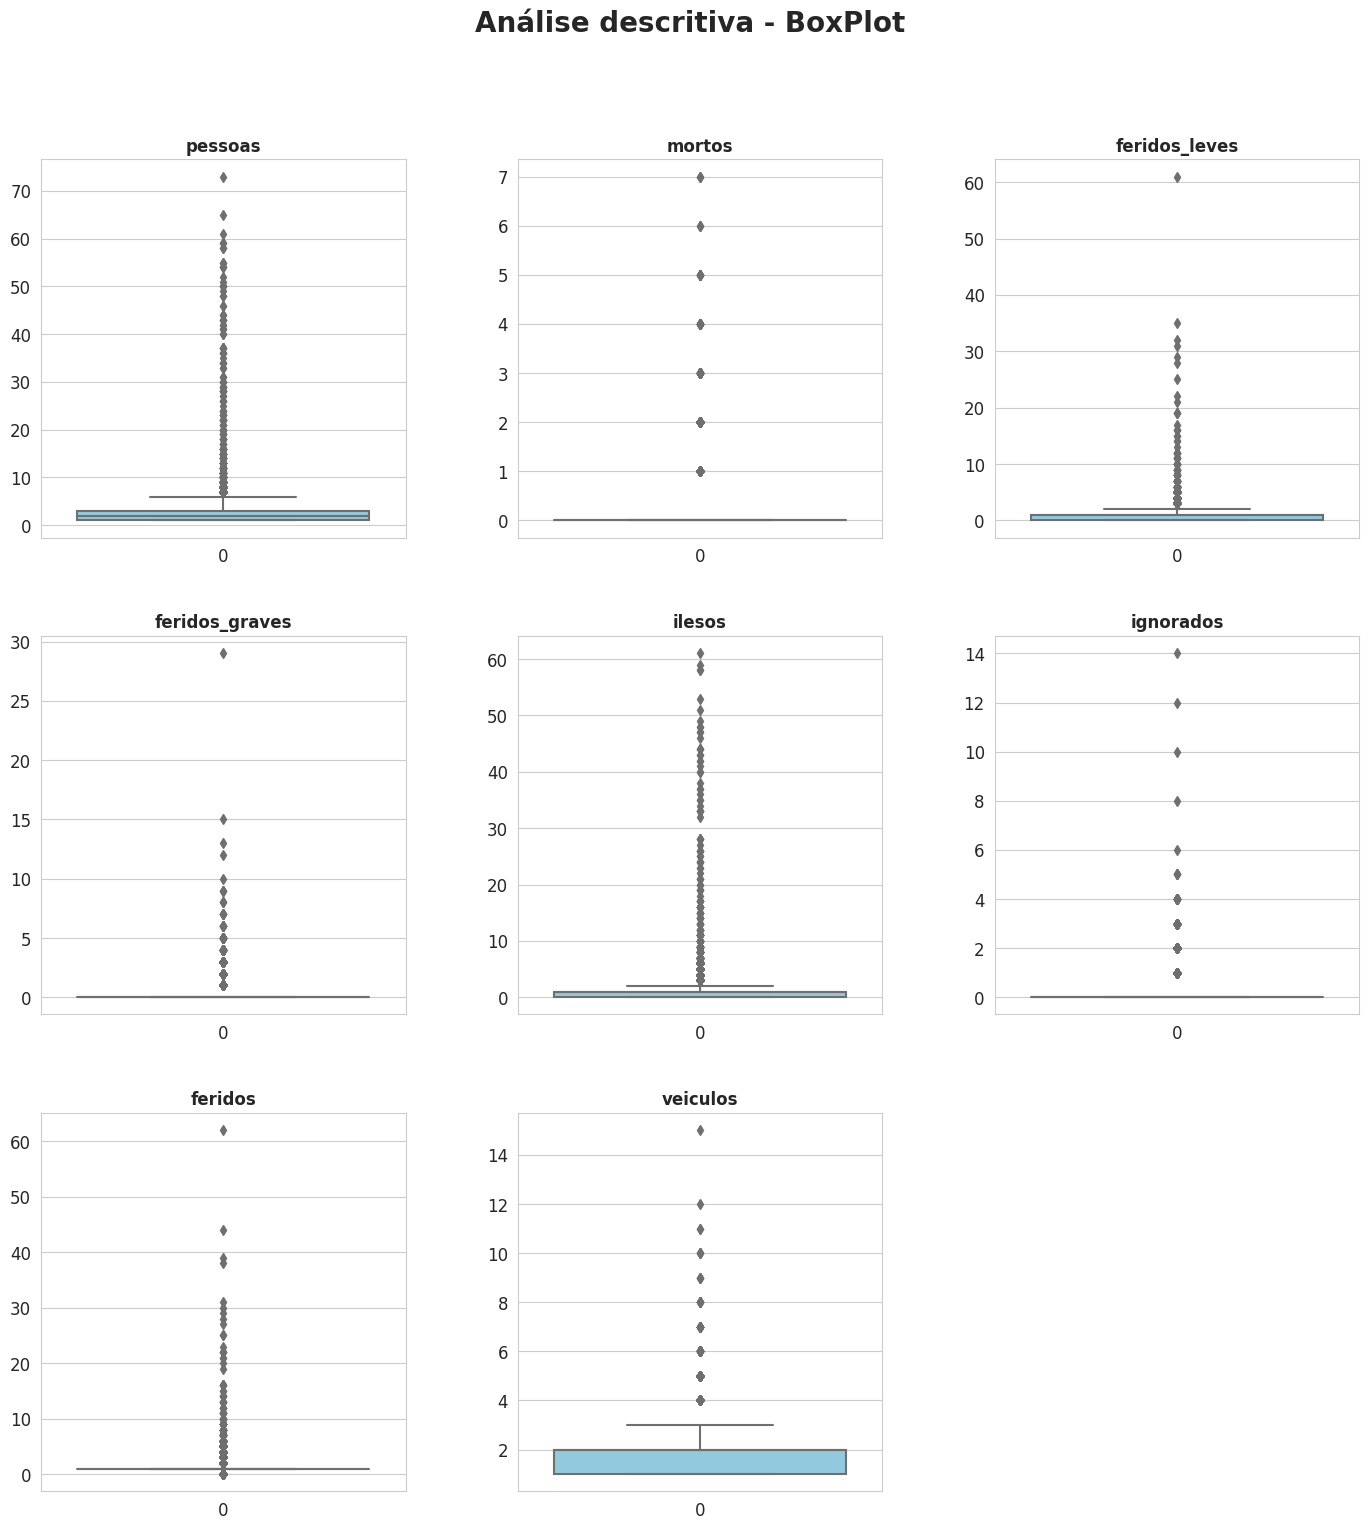

In [ ]:
def analise_var_boxplot(df):
    # Seleciona apenas colunas numéricas
    numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns

    # Define o número de linhas com base no número de colunas numéricas
    nrows = len(numeric_columns) // 3 + (len(numeric_columns) % 3 > 0)

    # Inicializa o painel de gráficos
    fig, axes = plt.subplots(nrows=nrows, ncols=3, figsize=(15, nrows * 5))

    # Ajusta o layout
    plt.tight_layout(pad=5)

    # Configura estilo e paleta de cores
    sns.set_style("whitegrid")

    # Plota boxplots para cada coluna numérica
    for i, column in enumerate(numeric_columns):
        sns.boxplot(data=df[column], ax=axes[i//3, i%3], color="skyblue")
        axes[i//3, i%3].set_title(f'{column}', fontdict={'fontsize': 12, 'fontweight': 'bold'})
        axes[i//3, i%3].set_ylabel('')
        axes[i//3, i%3].tick_params(axis='both', which='major', labelsize=12)

    # Remove gráficos vazios (se houver)
    for j in range(i+1, nrows*3):
        fig.delaxes(axes.flatten()[j])

    # Adiciona título principal
    fig.suptitle("Análise descritiva - BoxPlot", fontsize=20, fontweight='bold', y=1.05)

# Plotando os boxplots estilizados com títulos simplificados usando a função definida
analise_var_boxplot(df_prf_2023[['pessoas', 'mortos', 'feridos_leves', 'feridos_graves', 'ilesos', 'ignorados', 'feridos', 'veiculos']])



**Variabilidade e Distribuição:**

- Variáveis como pessoas, mortos, feridos_leves, feridos_graves, ilesos, ignorados e feridos têm a maioria de seus valores concentrados perto de zero, indicando que muitos incidentes envolvem poucas pessoas ou nenhuma vítima. No entanto, existem alguns valores atipicamente altos para estas variáveis, sugerindo que, embora raros, existem incidentes com um número significativo de envolvidos ou vítimas.

**Concentração de Dados:**

- A linha central do box (mediana) para variáveis como mortos, feridos_leves, feridos_graves, e ilesos está no valor zero. Isso indica que a maioria dos incidentes não resulta em mortes ou ferimentos.

**Amplitude dos Dados:**

- A variabilidade dos dados é diversificada, com algumas variáveis exibindo valores concentrados em uma faixa estreita (IQR pequeno), enquanto outras apresentam maior dispersão (IQR maior).

**Distribuição:**

- Os histogramas corroboram que a maior parte dos valores está agrupada próximo a zero, reforçando a tendência observada na concentração dos dados

### 4\.2 Distribuição de Variáveis Categóricas

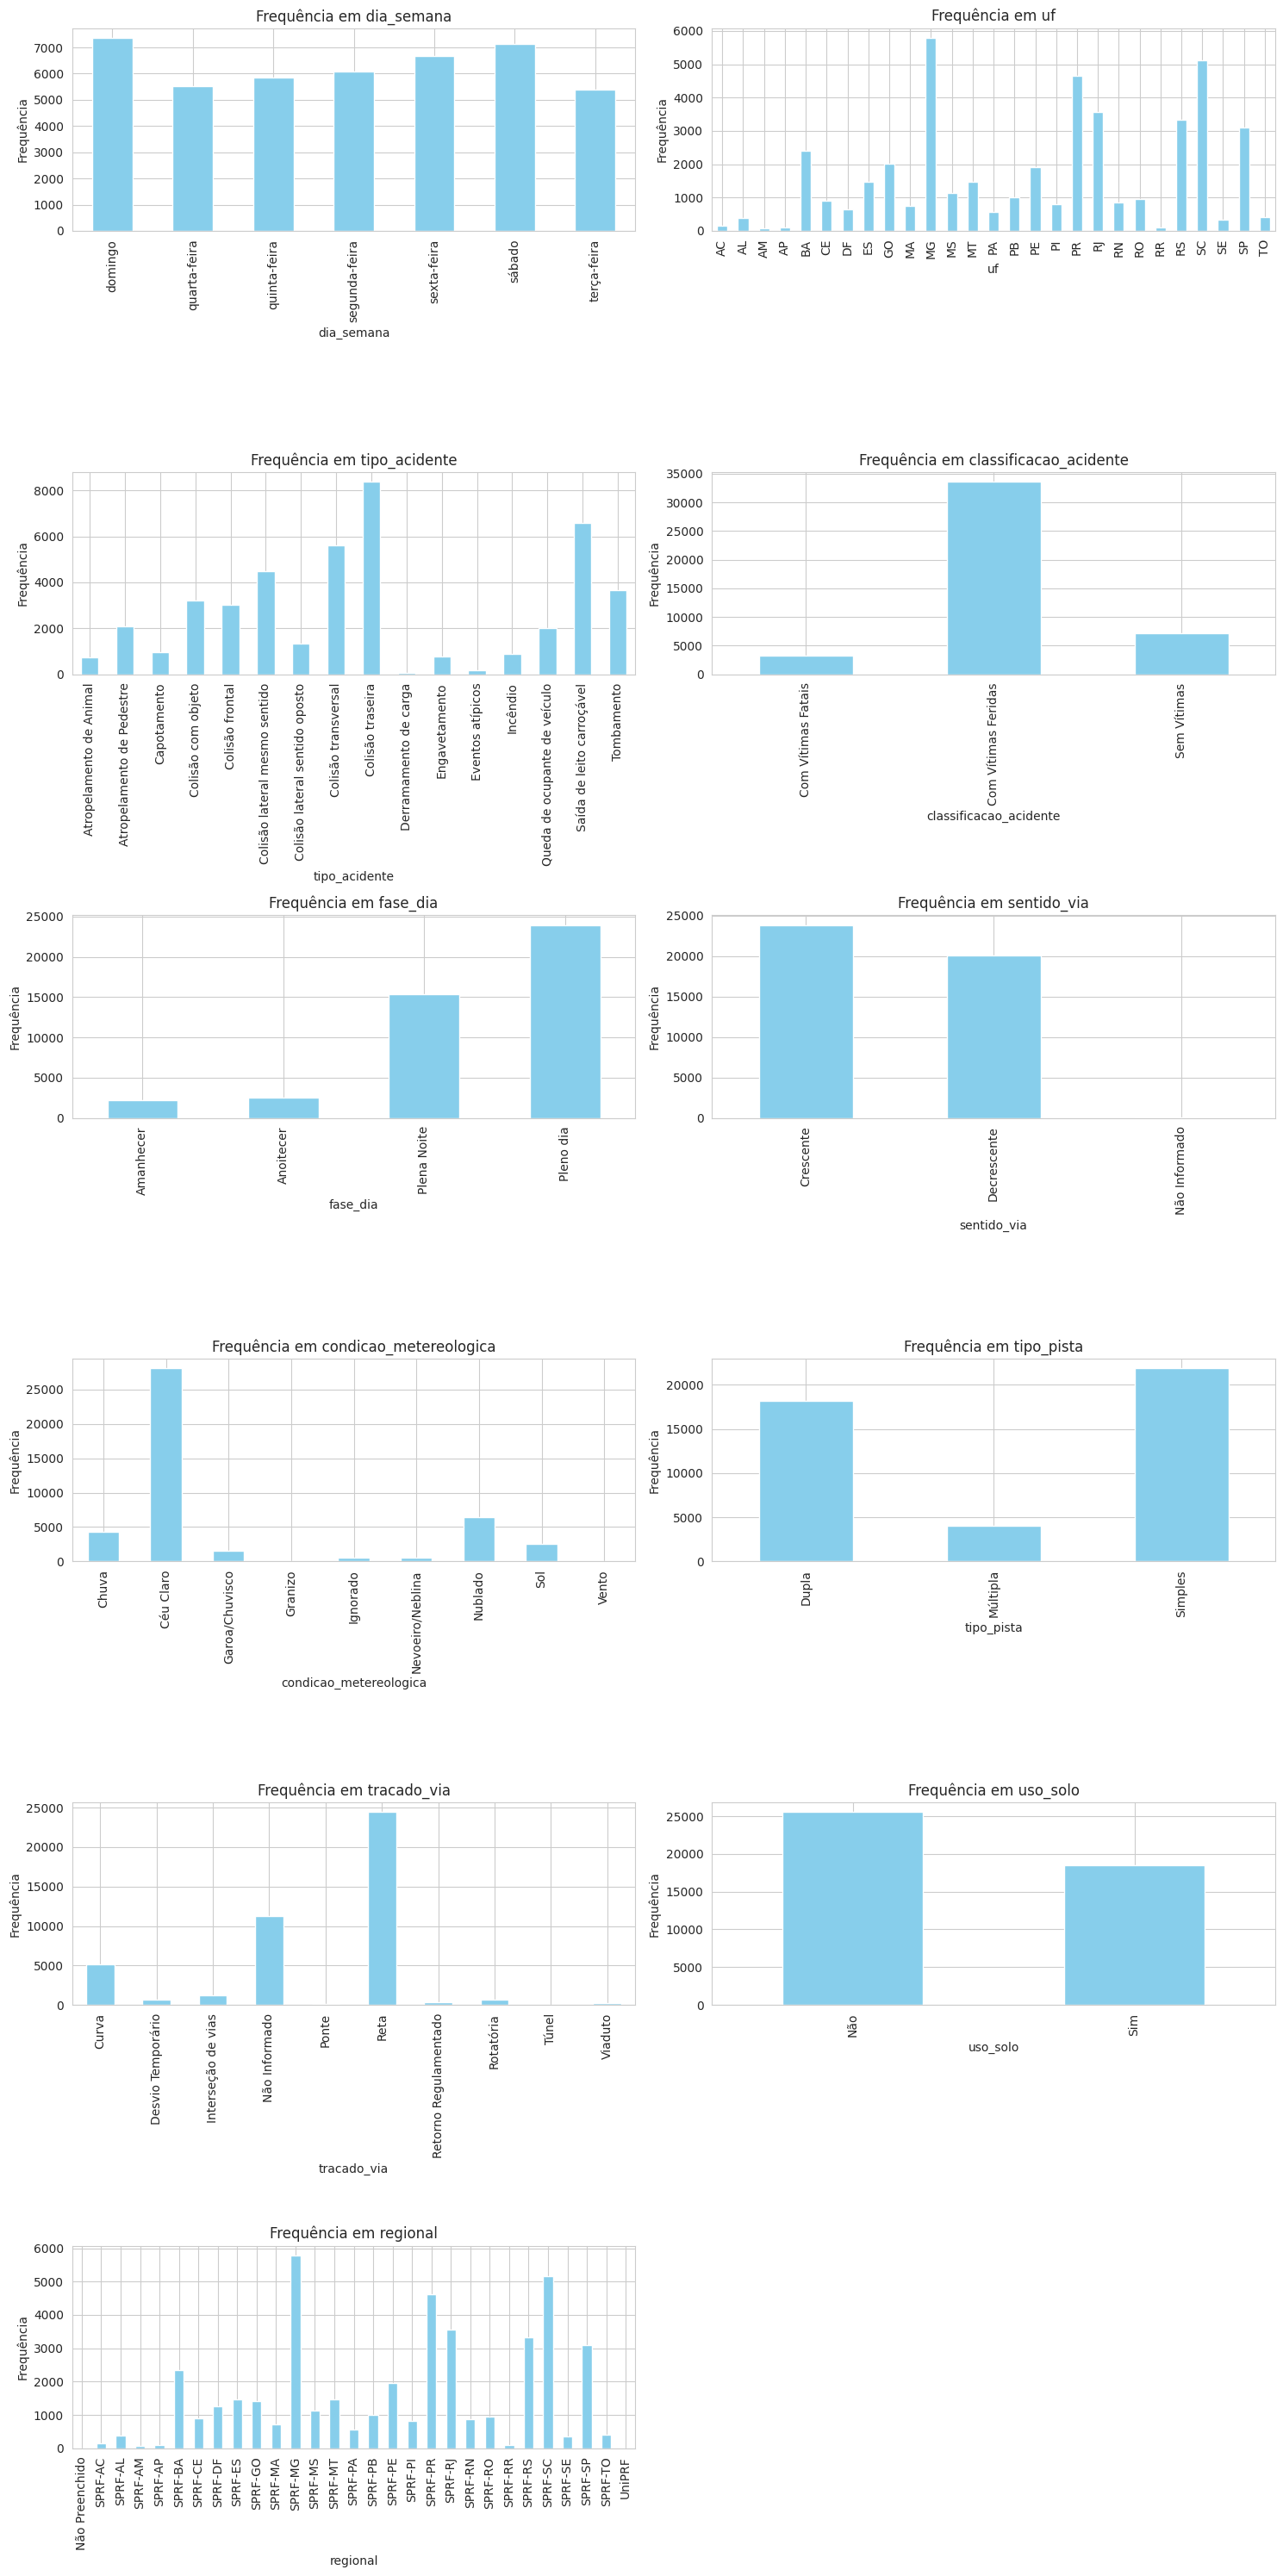

In [ ]:
def plot_categorical_frequency_pt(df, corte_cardinalidade=30, graficos_por_linha=2):

    # Gera metadados para o DataFrame
    metadados = []
    for coluna in df.columns:
        metadados.append({
            'Variável': coluna,
            'Tipo': df[coluna].dtype,
            'Cardinalidade': df[coluna].nunique()
        })

    df_metadados = pd.DataFrame(metadados)

    # Filtra colunas com cardinalidade maior que o corte e tipos não numéricos
    variaveis_categoricas = df_metadados[(df_metadados['Cardinalidade'] <= corte_cardinalidade) & (df_metadados['Tipo'] == 'object')]

    # Calcula o número de linhas e colunas para os subplots
    n_linhas = -(-len(variaveis_categoricas) // graficos_por_linha)  # Ceiling division
    n_colunas = min(len(variaveis_categoricas), graficos_por_linha)

    # Plota as variáveis categóricas
    fig, axs = plt.subplots(nrows=n_linhas, ncols=n_colunas, figsize=(15, 5 * n_linhas))

    for i, (idx, linha) in enumerate(variaveis_categoricas.iterrows()):
        var = linha['Variável']
        ax = axs[i // graficos_por_linha, i % graficos_por_linha]
        df[var].value_counts().sort_index().plot(kind='bar', ax=ax, color='skyblue')
        ax.set_title(f'Frequência em {var}')
        ax.set_ylabel('Frequência')
        ax.set_xlabel(var)

    # Remove os eixos vazios, se houver
    for j in range(i + 1, n_linhas * n_colunas):
        axs[j // graficos_por_linha, j % graficos_por_linha].axis('off')

    plt.tight_layout()
    plt.show()

# Testa a função com os dados e o corte padrão de cardinalidade
plot_categorical_frequency_pt(df_prf_2023, corte_cardinalidade=30, graficos_por_linha=2)


**Dias da Semana (dia_semana):**

- Predominantemente, os registros indicam que a maioria dos acidentes ocorre nos finais de semana, especialmente aos sábados e domingos. Essa tendência sugere um possível aumento de atividades ou eventos que resultam em um maior número de ocorrências nesses dias.

**UF (Estados):**

- Alguns estados apresentam uma contagem mais elevada de registros em comparação com outros. É crucial levar em consideração a população e o tamanho de cada estado ao interpretar esses dados. Estados mais populosos ou com extensas redes rodoviárias podem naturalmente registrar mais ocorrências.

**Causa do Acidente (causa_acidente):**

- Algumas causas parecem ser mais prevalentes do que outras. Por exemplo, "Falta de atenção" e "Desobediência às normas de trânsito" surgem como causas comuns, sugerindo a necessidade de campanhas de conscientização para abordar esses comportamentos.

**Classificação do Acidente (classificacao_acidente):**

- A maioria dos acidentes parece resultar em nenhum ferido ou apenas feridos leves, o que é positivo. No entanto, ainda há uma parcela significativa de acidentes com feridos graves e mortos, destacando a importância contínua da segurança no trânsito.

**Fase do Dia (fase_dia):**

- Os acidentes parecem ser mais frequentes durante o dia, com picos ao amanhecer e anoitecer. Essa observação pode estar relacionada às horas de pico de tráfego ou a condições de visibilidade reduzida durante esses períodos.

**Condição Meteorológica (condicao_metereologica):**

- A maioria dos registros ocorre em condições meteorológicas claras, o que era esperado. No entanto, isso também destaca que condições adversas, como chuva ou neblina, não são os principais contribuintes para os acidentes, embora possam aumentar sua gravidade.

**Tipo de Pista (tipo_pista):**

- A maioria dos registros ocorre em pistas simples, sugerindo que essas pistas podem apresentar mais riscos ou que são mais comuns nas áreas abrangidas pelos dados. Essa informação é relevante para avaliar as características específicas das vias onde ocorrem os acidentes.

### 4\.3 Análise Geográfica utilizando as variáveis Latitude e Longitude

<ipython-input-32-4047083ed420>:8: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


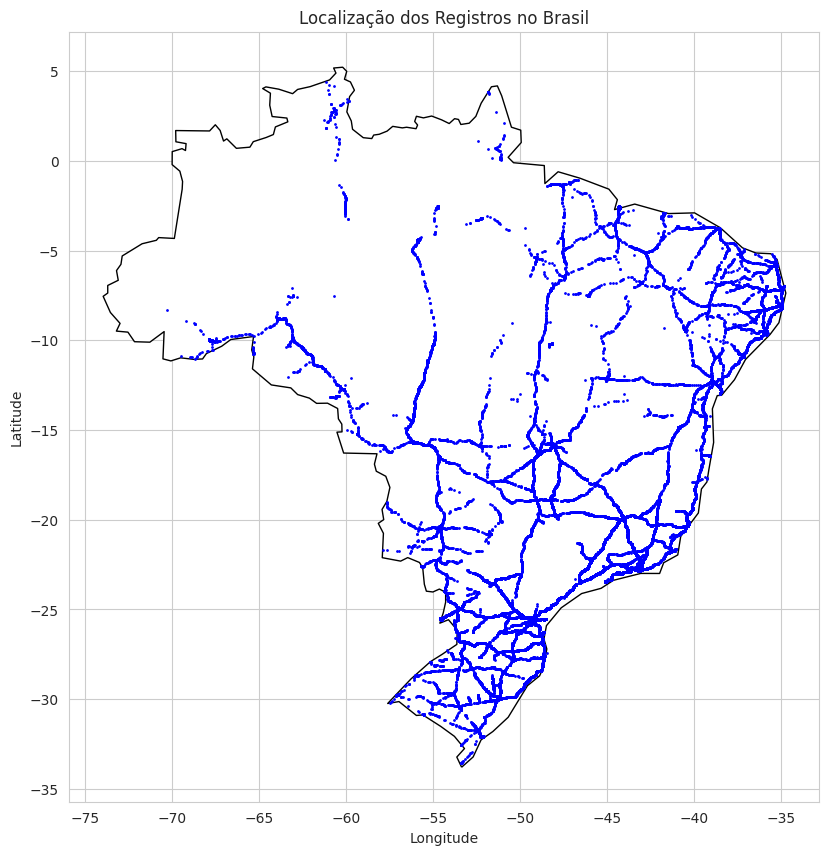

In [ ]:
# Usando cordenadas geográficas para plotar no mapa do Brasil

# https://geopandas.org/en/stable/
import geopandas as gpd
import matplotlib.pyplot as plt

# Carrega o mapa do Brasil
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
brazil = world[world.name == "Brazil"]
data = df_prf_2023
data_map = data.dropna(subset=['latitude', 'longitude'])

# Plotting
fig, ax = plt.subplots(figsize=(10, 10))
brazil.plot(ax=ax, color='white', edgecolor='black')
ax.scatter(data_map['longitude'], data_map['latitude'], color='blue', s=1)
plt.title('Localização dos Registros no Brasil')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()


In [ ]:
sample_data = data_map.sample(min(1000, len(data_map)))

m_corrected = folium.Map(location=[-15.77972, -47.92972], zoom_start=4)  # Centered around Brasília

for idx, row in sample_data.iterrows():
    if "Com Vítimas Fatais" in row['classificacao_acidente']:
        icon_color = "red"
        icon_type = "times"
        folium.Marker(
            location=[row['latitude'], row['longitude']],
            popup=row['causa_acidente'],
            icon=folium.Icon(icon=icon_type, color=icon_color, prefix='fa')
        ).add_to(m_corrected)
    else:
        folium.CircleMarker(
            location=[row['latitude'], row['longitude']],
            radius=5,
            color="blue",
            fill=True,
            fill_color="blue",
            fill_opacity=0.6
        ).add_to(m_corrected)

m_corrected
